# Prepare the points

In [50]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

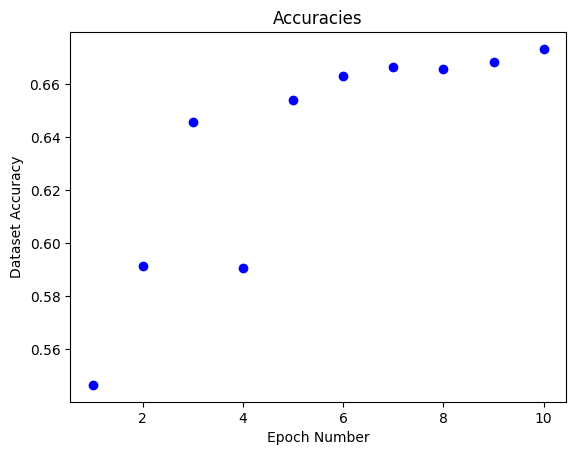

In [51]:
from sklearn.model_selection import train_test_split

X = np.arange(start=1, stop=11, step=1)
y = np.array([0.5466, 0.5915, 0.6459, 0.5907, 0.6542, 0.6630, 0.6664, 0.6657, 0.6684, 0.6733])

plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')
plt.title('Accuracies')
plt.scatter(X, y, color='blue')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Mathematic Regression Models

## Linear Regression

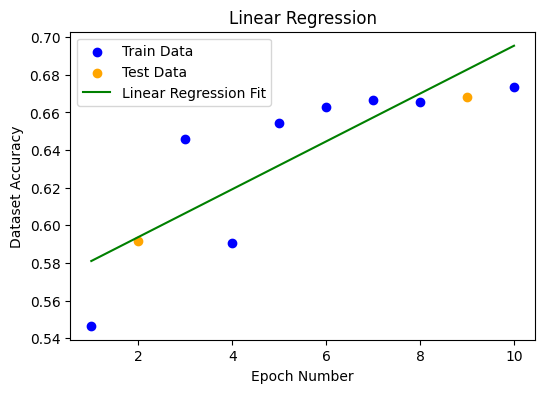

Mean Absolute Error: 0.0083


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Prepare a smooth X range for plotting the regression line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Fit linear regression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

# Predict on the smooth X range
y_plot = linreg.predict(X_plot)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_plot, y_plot, color='green', label='Linear Regression Fit')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')
plt.show()

# Evaluate the model
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

# Polynomial Regression

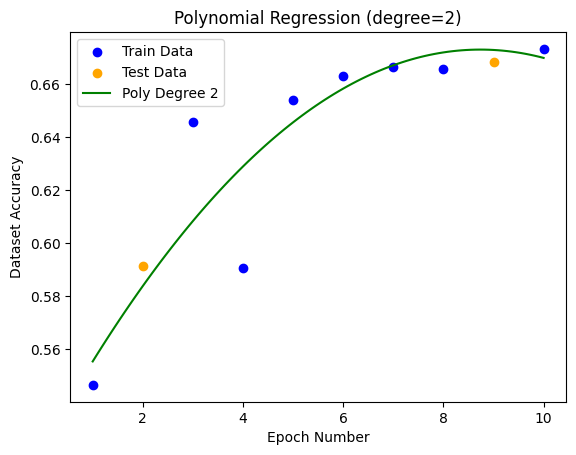

Degree 2 Mean Absolute Error: 0.0061


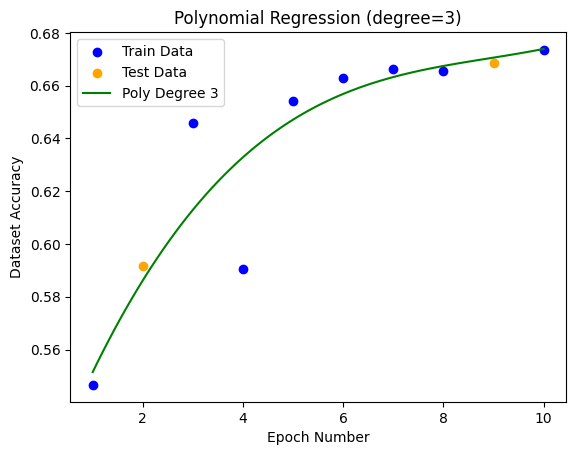

Degree 3 Mean Absolute Error: 0.0038


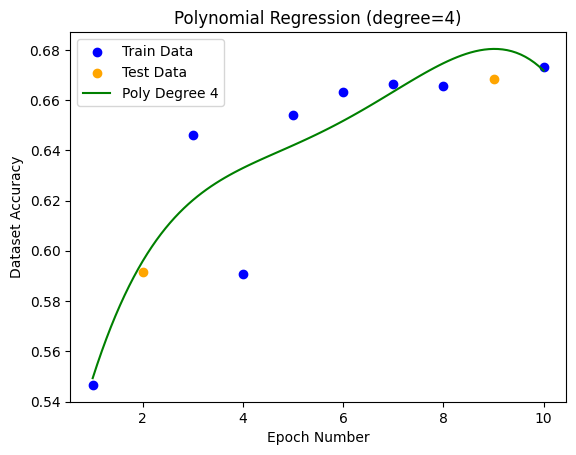

Degree 4 Mean Absolute Error: 0.0082


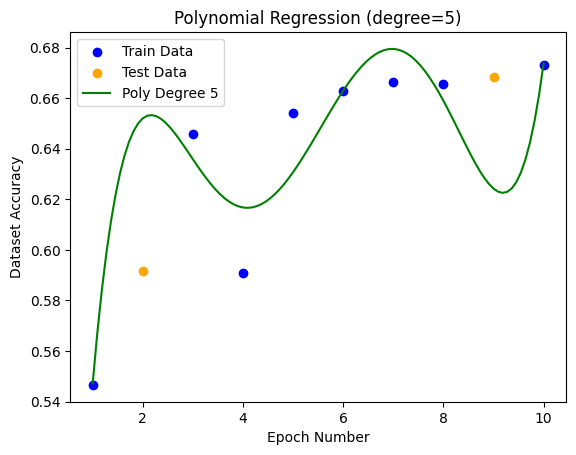

Degree 5 Mean Absolute Error: 0.0524


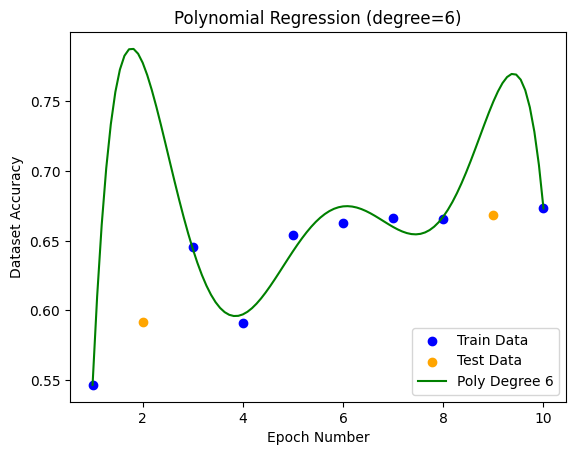

Degree 6 Mean Absolute Error: 0.1339


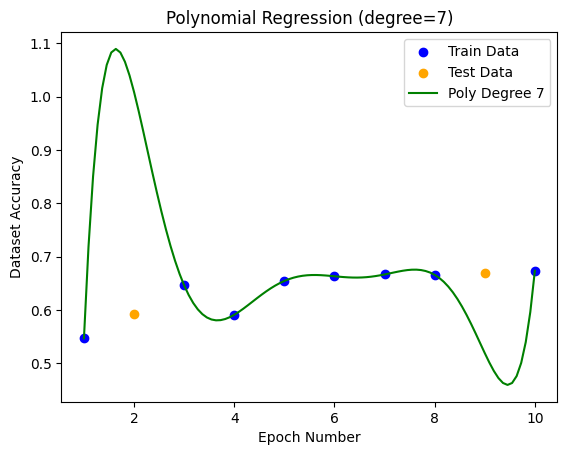

Degree 7 Mean Absolute Error: 0.2835


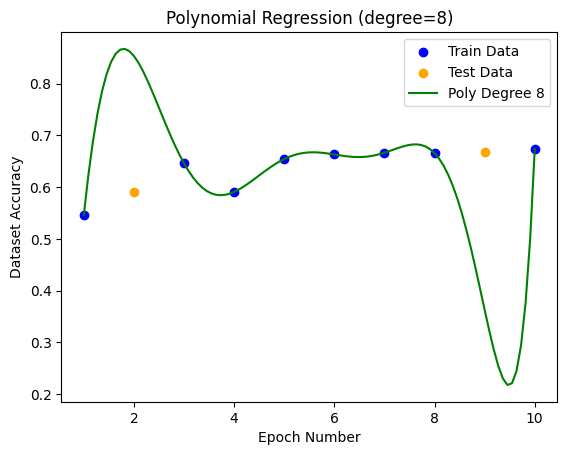

Degree 8 Mean Absolute Error: 0.2835


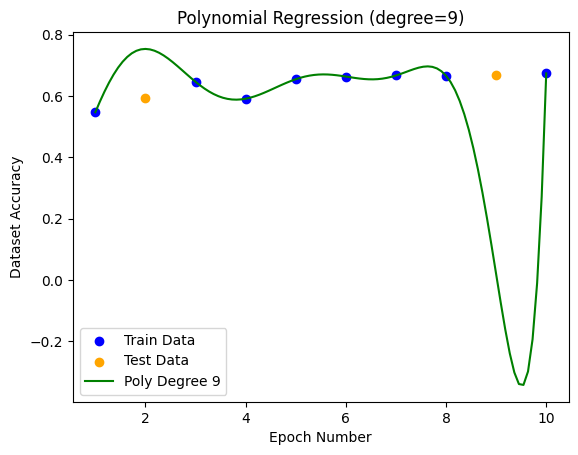

Degree 9 Mean Absolute Error: 0.4054


In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # For smooth curve

poly_models = []
for i in range(2, 10):
    plt.figure(i)
    poly = PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    X_poly_plot = poly.transform(X_plot)
    
    polyreg = LinearRegression(fit_intercept=True)
    polyreg.fit(X_poly_train, y_train)
    
    y_plot = polyreg.predict(X_poly_plot)
    y_pred = polyreg.predict(X_poly_test)  # Predict on test set for MAE

    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X_plot, y_plot, color='green', label=f'Poly Degree {i}')
    plt.legend()
    plt.title(f'Polynomial Regression (degree={i})')
    plt.xlabel('Epoch Number')
    plt.ylabel('Dataset Accuracy')
    plt.show()
    
    poly_models.append(polyreg)
    # Evaluate the model
    print(f'Degree {i} Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}')

In conclusion, a third degree polynomial provides the best approximation on the data.

## Exponential Regression

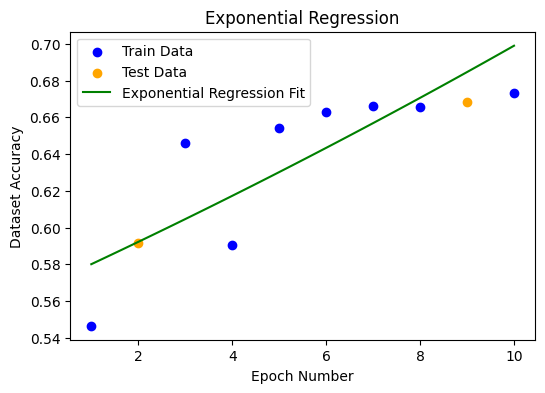

Mean Absolute Error: 0.0085


In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Only use positive y values for log transform
mask = y > 0
X_pos = X[mask].reshape(-1, 1)
y_pos = y[mask]

# Split as before
X_train, X_test, y_train, y_test = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)

# Take log of y for regression
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

# Fit linear regression on (X, log(y))
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, log_y_train)

# Predict log(y) and convert back
log_y_pred = linreg.predict(X_test)
y_pred = np.exp(log_y_pred)

# For plotting the curve
X_plot = np.linspace(X_pos.min(), X_pos.max(), 100).reshape(-1, 1)
log_y_plot = linreg.predict(X_plot)
y_plot = np.exp(log_y_plot)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_plot, y_plot, color='green', label='Exponential Regression Fit')
plt.legend()
plt.title('Exponential Regression')
plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')


## Logarithmic Regression

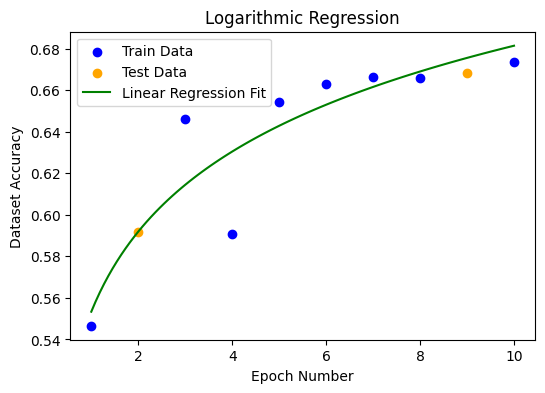

Mean Absolute Error: 0.2292


In [67]:
# Prepare a smooth X range for plotting the regression line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Fit linear regression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(np.log(X_train), y_train)

# Predict on the smooth X range
y_plot = linreg.predict(np.log(X_plot))

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_plot, y_plot, color='green', label='Linear Regression Fit')
plt.legend()
plt.title('Logarithmic Regression')
plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')
plt.show()

# Evaluate the model
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

# Built-in Scikit-Learn Regression Models

## Support Vector Regressor

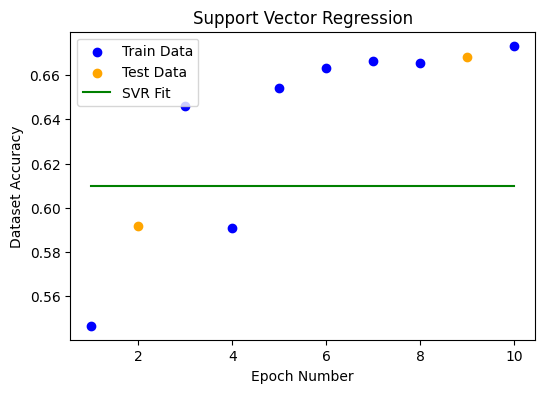

Mean Absolute Error: 0.0384


In [72]:
from sklearn.svm import SVR

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
# For plotting the curve
y_plot = svr.predict(X_plot)
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_plot, y_plot, color='green', label='SVR Fit')
plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')
plt.show()
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

## Decision Tree Regressor

Mean Absolute Error: 0.0238


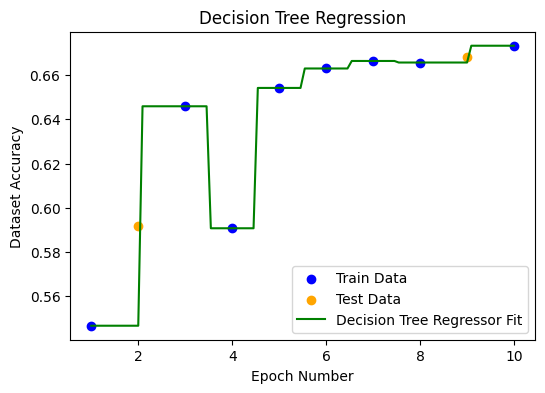

In [71]:
from sklearn.tree import DecisionTreeRegressor

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
# For plotting the curve
y_plot = dtr.predict(X_plot)
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_plot, y_plot, color='green', label='Decision Tree Regressor Fit')
plt.legend()
plt.title('Decision Tree Regression')
plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')


## Multi Layer Perceptron Regression

/Users/sonitambashta/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sonitambashta/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sonitambashta/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


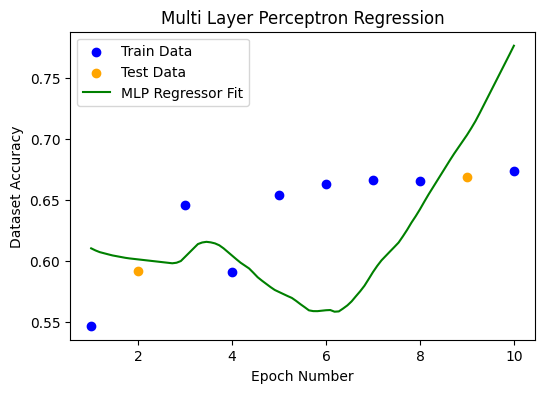

Mean Absolute Error: 0.0221


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_plot_scaled = scaler.transform(X_plot)

mlp = MLPRegressor(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
y_plot = mlp.predict(X_plot_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_plot, y_plot, color='green', label='MLP Regressor Fit')
plt.legend()
plt.title('Multi Layer Perceptron Regression')
plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

## Gaussian Process Regressor

Mean Absolute Error: 0.0213


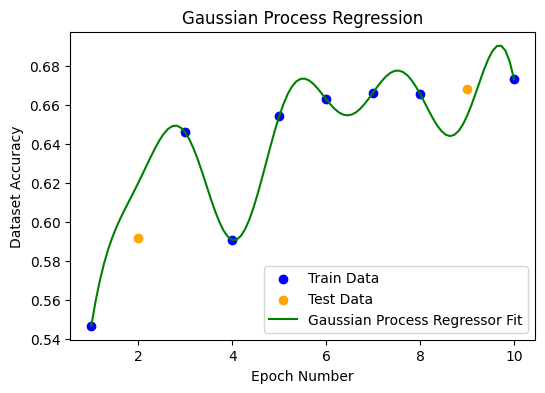

In [79]:
from sklearn.gaussian_process import GaussianProcessRegressor

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

gpr = GaussianProcessRegressor(random_state=42)
gpr.fit(X_train, y_train)
y_pred = gpr.predict(X_test)
# For plotting the curve
y_plot = gpr.predict(X_plot)
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_plot, y_plot, color='green', label='Gaussian Process Regressor Fit')
plt.legend()
plt.title('Gaussian Process Regression')
plt.xlabel('Epoch Number')
plt.ylabel('Dataset Accuracy')

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')


In [ ]:
cubic_model = poly_models[1]

# Create the transformer with degree=3
poly3 = PolynomialFeatures(degree=3)
poly3.fit(X_train)  # Fit on training data

# Transform your input value
x_new = np.array([[20]])
x_new_poly = poly3.transform(x_new)

# Predict using the cubic model
print(cubic_model.predict(x_new_poly))

[0.96880705]
